In [15]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests
df = pd.read_csv("Salary1.csv")

print(df.shape)

df.columns.values

(32561, 15)


array(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'], dtype=object)

In [17]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [18]:
df.sample(n=5, random_state=999)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27937,21,State-gov,478457,Some-college,10,Never-married,Other-service,Own-child,Black,Female,0,0,12,United-States,<=50K
2043,27,Self-emp-not-inc,208406,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K
2528,47,Self-emp-not-inc,102359,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,30,United-States,<=50K
574,27,Private,158156,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,70,United-States,<=50K
13929,32,Self-emp-not-inc,103642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,United-States,<=50K


In [19]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [21]:
x = df.drop(columns='salary')
y = df['salary']
y.value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [22]:
y = y.replace({'<=50K': 0, '>50K': 1})
y.value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [26]:
categorical_cols = x.columns[x.dtypes==object].tolist()
categorical_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [27]:
for col in categorical_cols:
    if (x[col].nunique() == 2):
        x[col] = pd.get_dummies(x[col], drop_first=True)
   
#use one-hot-encoding for categorical features with >2 levels
x = pd.get_dummies(x)

In [28]:
x.columns

Index(['age', 'fnlwgt', 'education-num', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov',
       ...
       'native-country_ Portugal', 'native-country_ Puerto-Rico',
       'native-country_ Scotland', 'native-country_ South',
       'native-country_ Taiwan', 'native-country_ Thailand',
       'native-country_ Trinadad&Tobago', 'native-country_ United-States',
       'native-country_ Vietnam', 'native-country_ Yugoslavia'],
      dtype='object', length=107)

In [29]:
x.sample(5, random_state=999)

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
27937,21,478457,10,0,0,0,12,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2043,27,208406,13,1,0,0,60,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2528,47,102359,13,1,0,0,30,0,0,0,...,0,0,0,0,0,0,0,1,0,0
574,27,158156,16,0,0,0,70,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13929,32,103642,9,1,0,0,55,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [30]:
from sklearn import preprocessing

x_df = x.copy()

x_scaler = preprocessing.MinMaxScaler()
x_scaler.fit(x)
x = x_scaler.fit_transform(x)

In [31]:
pd.DataFrame(x, columns=x_df.columns).sample(5, random_state=999)

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
27937,0.054795,0.316603,0.600000,0.0,0.0,0.0,0.112245,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2043,0.136986,0.133196,0.800000,1.0,0.0,0.0,0.602041,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2528,0.410959,0.061174,0.800000,1.0,0.0,0.0,0.295918,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
574,0.136986,0.099069,1.000000,0.0,0.0,0.0,0.704082,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13929,0.205479,0.062045,0.533333,1.0,0.0,0.0,0.551020,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [34]:
from sklearn.ensemble import RandomForestClassifier

num_features = 10
model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(x, y)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

best_features_rfi = x_df.columns[fs_indices_rfi].values
best_features_rfi

array(['fnlwgt', 'age', 'capital-gain', 'hours-per-week',
       'marital-status_ Married-civ-spouse', 'education-num',
       'relationship_ Husband', 'capital-loss',
       'marital-status_ Never-married', 'occupation_ Exec-managerial'],
      dtype=object)

In [35]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.16318821, 0.15147085, 0.0972244 , 0.08227647, 0.07070952,
       0.063272  , 0.04792657, 0.03190004, 0.0193826 , 0.01789806])

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

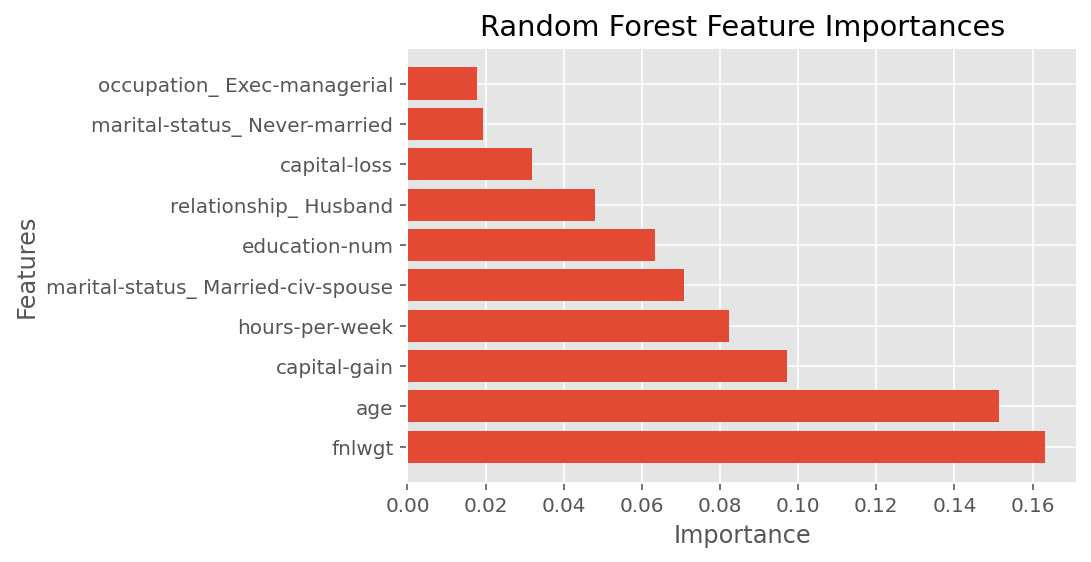

In [37]:
plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest')

In [38]:
n_samples = 20000

x_sample = pd.DataFrame(x).sample(n=n_samples, random_state=8).values
y_sample = pd.DataFrame(y).sample(n=n_samples, random_state=8).values

print(x_sample.shape)
print(y_sample.shape)

(20000, 107)
(20000, 1)


In [40]:
from sklearn.model_selection import train_test_split

x_sample_train, x_sample_test, \
y_sample_train, y_sample_test = train_test_split(x_sample, y_sample, 
                                                    test_size = 0.3, random_state=999,
                                                    stratify = y_sample)

print(x_sample_train.shape)
print(x_sample_test.shape)

(14000, 107)
(6000, 107)


In [41]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

cv_method = StratifiedKFold(n_splits=5, shuffle=True, random_state=999)

In [42]:
from sklearn.base import BaseEstimator, TransformerMixin

# custom function for RFI feature selection inside a pipeline
# here we use n_estimators=100
class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    
    # class constructor 
    # make sure class attributes end with a "_"
    # per scikit-learn convention to avoid errors
    def __init__(self, n_features_=10):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    # override the fit function
    def fit(self, X, y):
        from sklearn.ensemble import RandomForestClassifier
        from numpy import argsort
        model_rfi = RandomForestClassifier(n_estimators=100)
        model_rfi.fit(X, y)
        self.fs_indices_ = argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_] 
        return self 
    
    # override the transform function
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

pipe_KNN = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()), 
                           ('knn', KNeighborsClassifier())])

params_pipe_KNN = {'rfi_fs__n_features_': [10, 20, x.shape[1]],
                   'knn__n_neighbors': [1, 5, 10, 15, 20],
                   'knn__p': [1, 2]}

gs_pipe_KNN = GridSearchCV(estimator=pipe_KNN, 
                           param_grid=params_pipe_KNN, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-2,
                           scoring='roc_auc',
                           verbose=1) 

In [45]:
gs_pipe_KNN.fit(x_sample_train, y_sample_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [46]:
gs_pipe_KNN.best_params_

{'knn__n_neighbors': 20, 'knn__p': 2, 'rfi_fs__n_features_': 10}

In [47]:
gs_pipe_KNN.best_score_

0.8840210881008066

In [48]:
def get_search_results(gs):

    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores),
             'std_score': np.std(scores),
             'min_score': np.min(scores),
             'max_score': np.max(scores)}
        return pd.Series({**params,**scores})

    models = []
    scores = []

    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))

    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))

    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)

    columns_first = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]

    return pipe_results[columns]

In [49]:
results_KNN = get_search_results(gs_pipe_KNN)
results_KNN.head()

,mean_score,std_score,max_score,min_score,knn__n_neighbors,knn__p,rfi_fs__n_features_
27,0.884021,0.003798,0.888387,0.878584,20.0,2.0,10.0
24,0.883874,0.003439,0.887904,0.877763,20.0,1.0,10.0
21,0.882481,0.003312,0.886130,0.876243,15.0,2.0,10.0
18,0.881511,0.003286,0.886181,0.876643,15.0,1.0,10.0
26,0.877583,0.001828,0.879479,0.874843,20.0,1.0,107.0


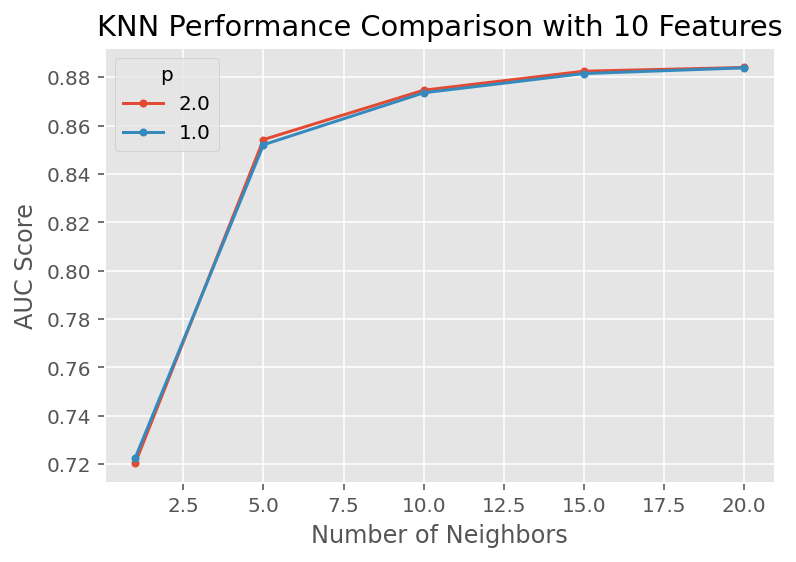

In [50]:
results_KNN_10_features = results_KNN[results_KNN['rfi_fs__n_features_'] == 10.0]

for i in results_KNN_10_features['knn__p'].unique():
    temp = results_KNN_10_features[results_KNN_10_features['knn__p'] == i]
    plt.plot(temp['knn__n_neighbors'], temp['mean_score'], marker = '.', label = i)
    
plt.legend(title = "p")
plt.xlabel('Number of Neighbors')
plt.ylabel("AUC Score")
plt.title("KNN Performance Comparison with 10 Features")
plt.show()

In [51]:
from sklearn.preprocessing import PowerTransformer
x_sample_train_transformed = PowerTransformer().fit_transform(x_sample_train)

In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV

pipe_NB = Pipeline([('rfi_fs', RFIFeatureSelector()), 
                     ('nb', GaussianNB())])

params_pipe_NB = {'rfi_fs__n_features_': [10, 20, x.shape[1]],
                  'nb__var_smoothing': np.logspace(1,-3, num=200)}

n_iter_search = 20
gs_pipe_NB = RandomizedSearchCV(estimator=pipe_NB, 
                          param_distributions=params_pipe_NB, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          n_iter=n_iter_search,
                          verbose=1) 

gs_pipe_NB.fit(x_sample_train_transformed, y_sample_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [55]:
gs_pipe_NB.best_params_

{'rfi_fs__n_features_': 20, 'nb__var_smoothing': 5.231099308056262}

In [56]:
gs_pipe_NB.best_score_

0.8840453207069355

In [57]:
results_NB = get_search_results(gs_pipe_NB)
results_NB.head()

,mean_score,std_score,max_score,min_score,rfi_fs__n_features_,nb__var_smoothing
0,0.884045,0.003483,0.887849,0.877560,20.0,5.231099
1,0.880781,0.002842,0.884086,0.876466,10.0,1.035322
17,0.879344,0.002932,0.883268,0.875083,10.0,0.204907
11,0.877749,0.004189,0.882235,0.870212,20.0,0.357079
9,0.876953,0.003392,0.881587,0.872149,10.0,0.017629


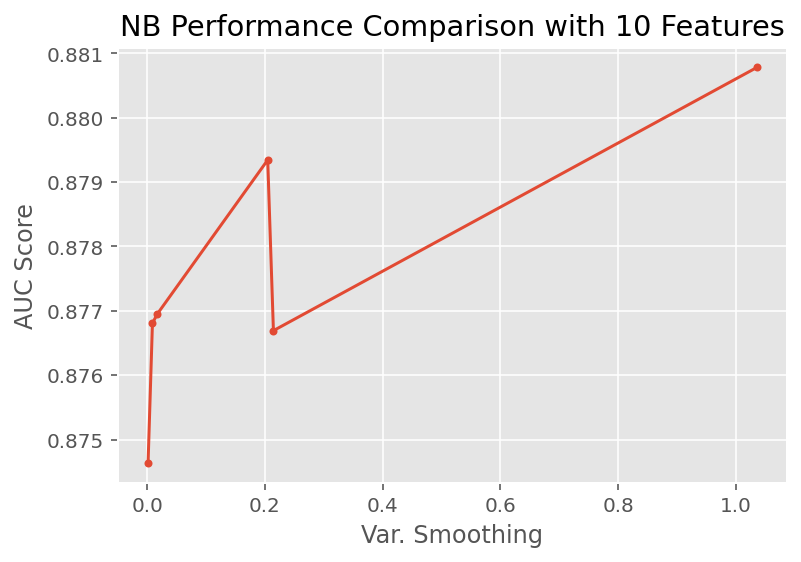

In [58]:
results_NB_10_features = results_NB[results_NB['rfi_fs__n_features_'] == 10.0].sort_values('nb__var_smoothing')

plt.plot(results_NB_10_features['nb__var_smoothing'], results_NB_10_features['mean_score'], marker = '.', label = i)    
plt.xlabel('Var. Smoothing')
plt.ylabel("AUC Score")
plt.title("NB Performance Comparison with 10 Features")
plt.show()

In [59]:
from sklearn.tree import DecisionTreeClassifier

pipe_DT = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('dt', DecisionTreeClassifier(criterion='gini', random_state=111))])

params_pipe_DT = {'rfi_fs__n_features_': [10, 20, x.shape[1]],
                  'dt__max_depth': [3, 4, 5],
                  'dt__min_samples_split': [2, 5]}

gs_pipe_DT = GridSearchCV(estimator=pipe_DT, 
                          param_grid=params_pipe_DT, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_DT.fit(x_sample_train, y_sample_train);

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [60]:
gs_pipe_DT.best_params_

{'dt__max_depth': 5, 'dt__min_samples_split': 5, 'rfi_fs__n_features_': 10}

In [61]:
gs_pipe_DT.best_score_

0.8872618647487105

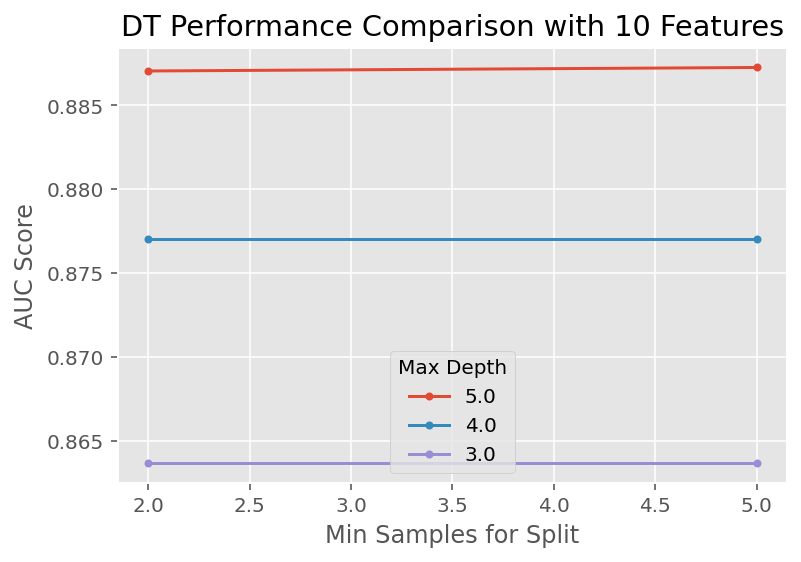

In [62]:
results_DT = get_search_results(gs_pipe_DT)
results_DT_10_features = results_DT[results_DT['rfi_fs__n_features_'] == 10.0]


for i in results_DT_10_features['dt__max_depth'].unique():
    temp = results_DT_10_features[results_DT_10_features['dt__max_depth'] == i]
    plt.plot(temp['dt__min_samples_split'], temp['mean_score'], marker = '.', label = i)
    
plt.legend(title = "Max Depth")
plt.xlabel('Min Samples for Split')
plt.ylabel("AUC Score")
plt.title("DT Performance Comparison with 10 Features")
plt.show()

In [63]:
params_pipe_DT2 = {'rfi_fs__n_features_': [10],
                  'dt__max_depth': [5, 10, 15],
                  'dt__min_samples_split': [5, 50, 100, 150, 200, 250]}

gs_pipe_DT2 = GridSearchCV(estimator=pipe_DT, 
                          param_grid=params_pipe_DT2, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_DT2.fit(x_sample_train, y_sample_train);

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [64]:
gs_pipe_DT2.best_params_

{'dt__max_depth': 10, 'dt__min_samples_split': 200, 'rfi_fs__n_features_': 10}

In [65]:
gs_pipe_DT2.best_score_

0.9010721501205543

In [66]:
results_DT = get_search_results(gs_pipe_DT2)
results_DT.head()

,mean_score,std_score,max_score,min_score,dt__max_depth,dt__min_samples_split,rfi_fs__n_features_
10,0.901072,0.004695,0.907886,0.894239,10.0,200.0,10.0
11,0.900733,0.004229,0.907436,0.895706,10.0,250.0,10.0
9,0.900487,0.004561,0.906758,0.894227,10.0,150.0,10.0
8,0.899004,0.004846,0.905715,0.891847,10.0,100.0,10.0
17,0.898213,0.003404,0.902532,0.893235,15.0,250.0,10.0


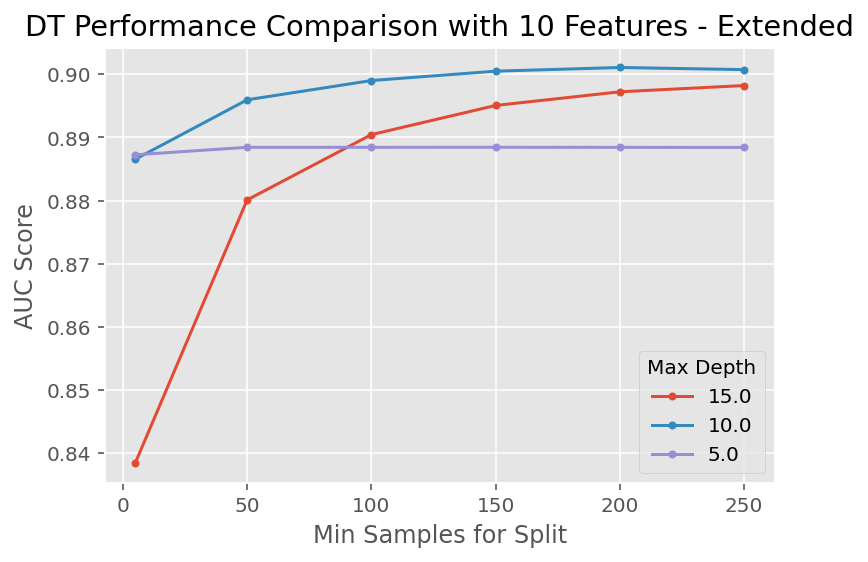

In [67]:
results_DT_10_features = results_DT[results_DT['rfi_fs__n_features_'] == 10.0].sort_values('dt__min_samples_split')


for i in results_DT_10_features['dt__max_depth'].unique():
    temp = results_DT_10_features[results_DT_10_features['dt__max_depth'] == i]
    plt.plot(temp['dt__min_samples_split'], temp['mean_score'], marker = '.', label = i)
    
plt.legend(title = "Max Depth")
plt.xlabel('Min Samples for Split')
plt.ylabel("AUC Score")
plt.title("DT Performance Comparison with 10 Features - Extended")
plt.show()

In [69]:
from sklearn.model_selection import cross_val_score

cv_method_ttest = StratifiedKFold(n_splits=10, shuffle=True, random_state=111)

cv_results_KNN = cross_val_score(estimator=gs_pipe_KNN.best_estimator_,
                                 X=x_sample_test,
                                 y=y_sample_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
cv_results_KNN.mean()

0.8784367038304224

In [70]:
x_sample_test_transformed = PowerTransformer().fit_transform(x_sample_test)

cv_results_NB = cross_val_score(estimator=gs_pipe_NB.best_estimator_,
                                X=x_sample_test_transformed,
                                y=y_sample_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_NB.mean()

0.8769217069754548

In [71]:
cv_results_DT = cross_val_score(estimator=gs_pipe_DT2.best_estimator_,
                                X=x_sample_test,
                                y=y_sample_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_DT.mean()

0.8957599639170215

In [72]:
from scipy import stats

print(stats.ttest_rel(cv_results_KNN, cv_results_NB))
print(stats.ttest_rel(cv_results_DT, cv_results_KNN))
print(stats.ttest_rel(cv_results_DT, cv_results_NB))

Ttest_relResult(statistic=0.4594678852881369, pvalue=0.656794763984041)
Ttest_relResult(statistic=4.801009226926285, pvalue=0.0009723512676863538)
Ttest_relResult(statistic=5.120945112969319, pvalue=0.0006271792659161378)


In [73]:
pred_KNN = gs_pipe_KNN.predict(x_sample_test)

In [74]:
x_test_transformed = PowerTransformer().fit_transform(x_sample_test)
pred_NB = gs_pipe_NB.predict(x_test_transformed)

In [75]:
pred_DT = gs_pipe_DT2.predict(x_sample_test)

In [76]:
from sklearn import metrics
print("\nClassification report for K-Nearest Neighbor") 
print(metrics.classification_report(y_sample_test, pred_KNN))
print("\nClassification report for Naive Bayes") 
print(metrics.classification_report(y_sample_test, pred_NB))
print("\nClassification report for Decision Tree") 
print(metrics.classification_report(y_sample_test, pred_DT))


Classification report for K-Nearest Neighbor
              precision    recall  f1-score   support

       <=50K       0.86      0.93      0.90      4546
        >50K       0.72      0.53      0.61      1454

    accuracy                           0.84      6000
   macro avg       0.79      0.73      0.75      6000
weighted avg       0.83      0.84      0.83      6000


Classification report for Naive Bayes
              precision    recall  f1-score   support

       <=50K       0.77      1.00      0.87      4546
        >50K       0.95      0.09      0.16      1454

    accuracy                           0.78      6000
   macro avg       0.86      0.54      0.51      6000
weighted avg       0.82      0.78      0.70      6000


Classification report for Decision Tree
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      4546
        >50K       0.74      0.61      0.67      1454

    accuracy                           0.85      6000
  

In [77]:
from sklearn import metrics
print("\nConfusion matrix for K-Nearest Neighbor") 
print(metrics.confusion_matrix(y_sample_test, pred_KNN))
print("\nConfusion matrix for Naive Bayes") 
print(metrics.confusion_matrix(y_sample_test, pred_NB))
print("\nConfusion matrix for Decision Tree") 
print(metrics.confusion_matrix(y_sample_test, pred_DT))


Confusion matrix for K-Nearest Neighbor
[[4250  296]
 [ 683  771]]

Confusion matrix for Naive Bayes
[[4539    7]
 [1329  125]]

Confusion matrix for Decision Tree
[[4234  312]
 [ 565  889]]
